tento kod slouzi k nalezeni cervenych krabicek na baterie 

In [2]:
from ultralytics import YOLO
import numpy as np
import cv2 
import cvzone
import time
import matplotlib.pyplot as plt

nastaveni thasholdu pro danou barvu co hledam 

In [9]:
low = np.array([160,50,100])
high = np.array([200,255,255])

nacteni obrazku

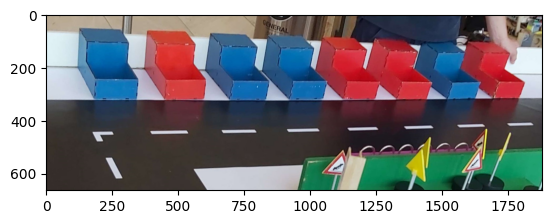

In [16]:
img = cv2.imread('obr4.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

aplikace masky 

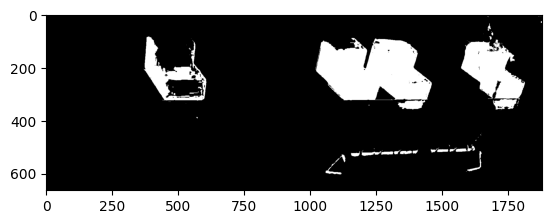

In [17]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(img,low,high)
contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE )
if len(contours) != 0:
    for contour in contours:
        if cv2.contourArea(contour) > 5000:
            x,y,w,h = cv2.boundingRect(contour)
            cv2.rectangle(img, (x,y),(x+w,y+h),(0,255,255),5)
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))

zobrazeni vysledku

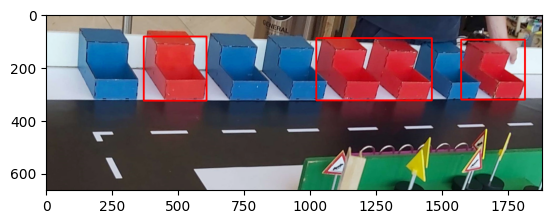

In [18]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_HSV2RGB))